In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa

In [3]:
np.random.seed(725)

In [8]:
demo_series = np.random.normal(size=(50,))
demo_series[20] = 10

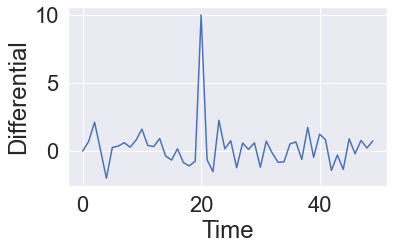

In [15]:
sns.set_theme(
    font_scale=2.0,
)
g = sns.lineplot(x=np.arange(len(demo_series)), y=demo_series)
g.set_xlabel('Time')
g.set_ylabel('Differential')
plt.tight_layout()
plt.savefig('results/figures/0.0-time-series-ex.png', dpi=400)
plt.show()


In [90]:
np.random.seed(825)
drop_p = 0.1
multi_sample = np.random.multinomial(50, [1/6.]*6, size=50)
multi_sample[20, :] = 0
index_sample = np.random.choice(np.arange(multi_sample.size),
                                size=int(drop_p * multi_sample.size),
                                )



def reformat_index(i):
    return i % multi_sample.shape[0], i // multi_sample.shape[0]

for idx in index_sample:
    x, y = reformat_index(idx)
    multi_sample[x, y] = 0

In [91]:
df = pd.DataFrame(multi_sample, columns=[f'm{i+1}' for i in range(6)])
df.index.name = 'Time'
df = df.reset_index()
df = pd.melt(df, id_vars=['Time'], var_name='Microbe', value_name='Abundance')
df.head()

,Time,Microbe,Abundance
0,0,m1,10
1,1,m1,6
2,2,m1,9
3,3,m1,9
4,4,m1,0


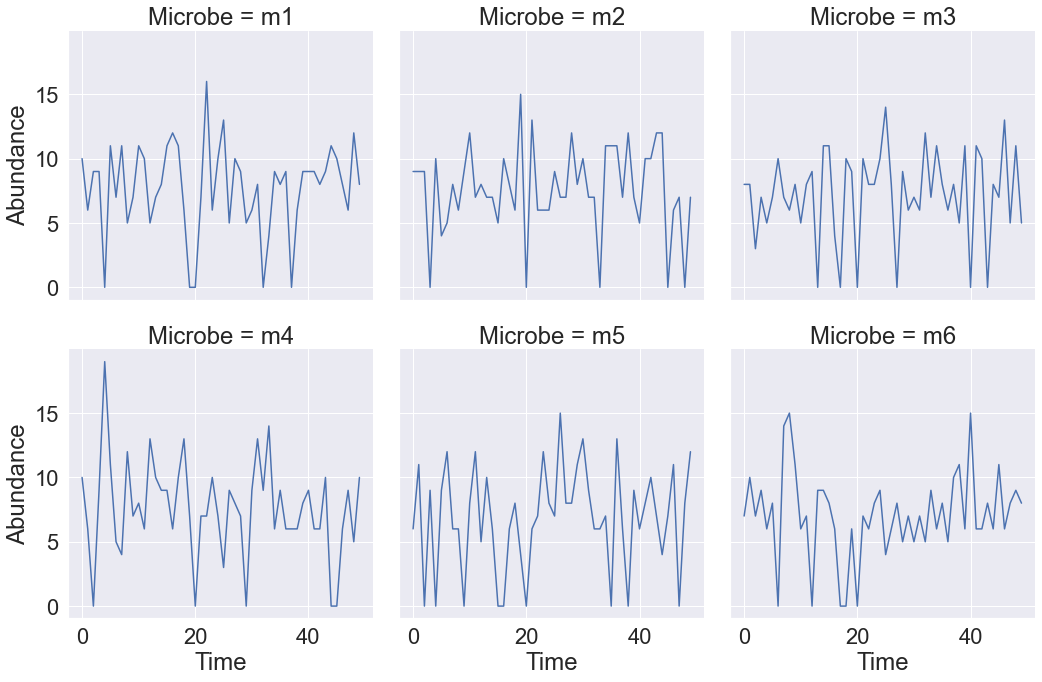

In [92]:
g = sns.relplot(
    x='Time', y='Abundance', data=df,
    col='Microbe', col_wrap=3,
    kind='line'
)


plt.tight_layout()
plt.savefig('results/figures/0.0-multi-time-series-ex.png', dpi=400)
plt.show()

In [93]:
beta_results = beta_diversity('jaccard', multi_sample)


pcoa_results = pcoa(beta_results).samples

/Users/garmstro/miniconda3/envs/anomaly-detection-qiime2-2020.11/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/garmstro/miniconda3/envs/anomaly-detection-qiime2-2020.11/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.2442524348841483 and the largest is 0.9699276255858152.
  RuntimeWarning


In [94]:
labels = pd.Series(np.zeros(multi_sample.shape[0]), name='Anomaly', index=pcoa_results.index)
labels[20] = 1
pcoa_results['Anomaly'] = labels

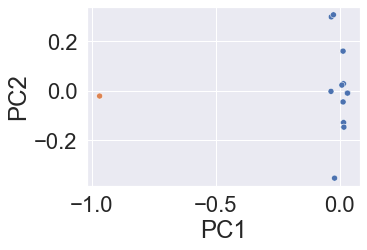

In [97]:
g = sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Anomaly',
    data=pcoa_results,
    legend=False
)
g.set_aspect('equal')

plt.tight_layout()
plt.savefig('results/figures/0.0-multi-time-series-pcoa.png', dpi=400)
plt.show()
